In [6]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt 
from adjustText import adjust_text
import seaborn as sns

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [67]:
df_F = df[df['job_country'] == 'Finland']


In [68]:
df_skills = df_F.explode('job_skills')
df_skills[['job_skills', 'job_title_short']]

,job_skills,job_title_short
173,sql,Data Engineer
173,azure,Data Engineer
173,aws,Data Engineer
173,power bi,Data Engineer
634,java,Data Scientist
...,...,...
785458,docker,Software Engineer
785463,None,Senior Data Engineer
785564,sql,Data Scientist
785564,power bi,Data Scientist


In [69]:
df_skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size()
df_skills_count

job_skills  job_title_short      
airflow     Business Analyst          3
            Cloud Engineer            4
            Data Analyst             11
            Data Engineer            91
            Data Scientist           19
                                     ..
yarn        Data Engineer             1
zoom        Data Analyst              2
            Data Scientist            1
            Senior Data Scientist     2
            Software Engineer         4
Length: 851, dtype: int64

In [70]:
#Need to convert this serie df_skills_count to datatframe
df_skills_count = df_skills_count.reset_index(name = 'skill_count')
df_skills_count

,job_skills,job_title_short,skill_count
0,airflow,Business Analyst,3
1,airflow,Cloud Engineer,4
2,airflow,Data Analyst,11
3,airflow,Data Engineer,91
4,airflow,Data Scientist,19
...,...,...,...
846,yarn,Data Engineer,1
847,zoom,Data Analyst,2
848,zoom,Data Scientist,1
849,zoom,Senior Data Scientist,2


In [71]:
#df_skills_count = df_skills_count.sort_values(by = 'skill_count',ascending=False, inplace=True )

df_skills_count.sort_values(by='skill_count', ascending=False, inplace=True)

df_skills_count


,job_skills,job_title_short,skill_count
544,python,Data Engineer,397
710,sql,Data Engineer,388
51,azure,Data Engineer,351
41,aws,Data Engineer,248
545,python,Data Scientist,207
...,...,...,...
833,windows,Machine Learning Engineer,1
15,alteryx,Senior Data Analyst,1
834,windows,Senior Data Scientist,1
17,angular,Data Analyst,1


In [81]:
job_titles = df_skills_count['job_title_short'].unique().tolist()[:3]
job_titles = sorted(job_titles)

In [85]:
df_job_count = df_F['job_title_short'].value_counts().reset_index(name = 'job_count')

In [89]:
df_skill_percent = pd.merge(df_skills_count, df_job_count, how = 'left', on = 'job_title_short')

In [98]:
df_skill_percent['skill_percent'] = 100*(df_skill_percent['skill_count']/df_skill_percent['job_count'])
df_skill_percent

,job_skills,job_title_short,skill_count,job_count,skill_percent
0,python,Data Engineer,397,699,56.795422
1,sql,Data Engineer,388,699,55.507868
2,azure,Data Engineer,351,699,50.214592
3,aws,Data Engineer,248,699,35.479256
4,python,Data Scientist,207,339,61.061947
...,...,...,...,...,...
846,windows,Machine Learning Engineer,1,101,0.990099
847,alteryx,Senior Data Analyst,1,67,1.492537
848,windows,Senior Data Scientist,1,111,0.900901
849,angular,Data Analyst,1,388,0.257732


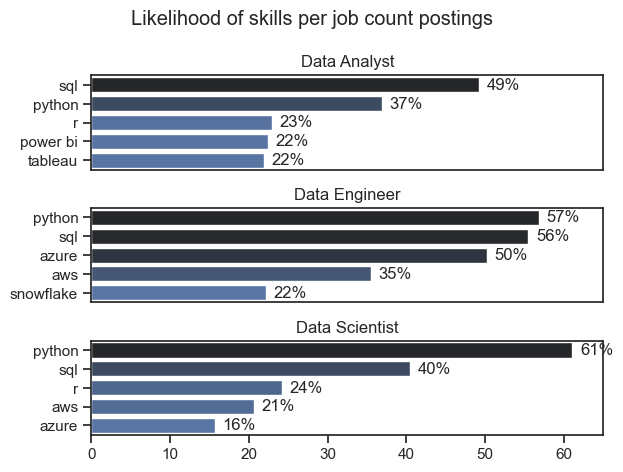

In [139]:
fig, ax = plt.subplots(len(job_titles), 1)
sns.set_theme(style = 'ticks')

for i, job_title in enumerate(job_titles):
    df_plot = df_skill_percent[df_skill_percent['job_title_short'] == job_title].head(5)
    #df_plot.plot(kind = 'barh', x = 'job_skills', y = 'skill_percent', ax = ax[i], title = job_title)
    sns.barplot(df_plot, x = 'skill_percent', y = 'job_skills', ax = ax[i],  hue = 'skill_count', palette = 'dark:b_r' )
    #ax[i].invert_yaxis()
    ax[i].set_title(job_title)
    ax[i].legend().set_visible(False)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].set_xlim(0, 65)
    

    for n, v in enumerate(df_plot['skill_percent']):
        ax[i].text(v+1, n, f'{v:.0f}%', va='center')

    if i != (len(job_titles)-1):
        ax[i].set_xticks([])

fig.suptitle('Likelihood of skills per job count postings')
fig.tight_layout()

